In [328]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [330]:
import os

dataset_dir = r"C:\Users\User\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3"

# List all files in the directory
files = os.listdir(dataset_dir)
print(files)  # Check which files exist

['amz_uk_price_prediction_dataset.csv']


In [332]:
import pandas as pd
from pathlib import Path

file_name = "amz_uk_price_prediction_dataset.csv"
file_path = Path(dataset_dir) / file_name

df = pd.read_csv(file_path)

In [333]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [336]:
len(df['category'].unique())

296

In [338]:
# Part 1: Understanding Product Categories - What are the most popular product categories on Amazon UK,
# and how do they compare in terms of listing frequency?

In [340]:
freq_table = df.category.value_counts()
prop_table = df.category.value_counts(normalize=True)

freq_table_5 = freq_table.head(5)
freq_table_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\User\AppData\Local\Temp\ipykernel_13500\47361892.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index,y=freq_table.values, palette="Set3")


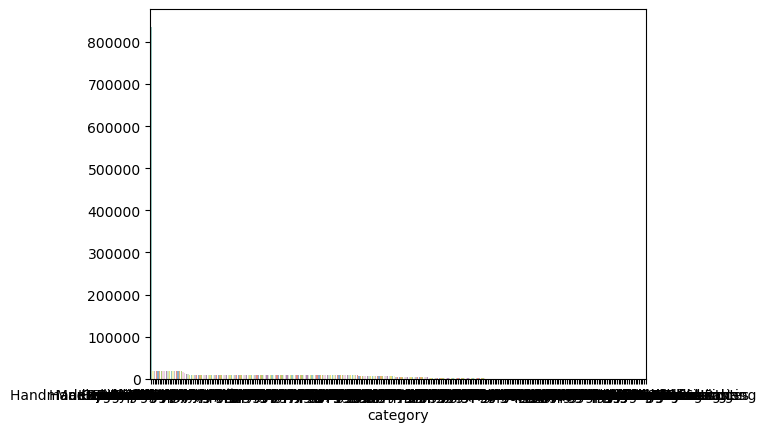

C:\Users\User\AppData\Local\Temp\ipykernel_13500\47361892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table_5.index,y=freq_table_5.values, palette="Set3")


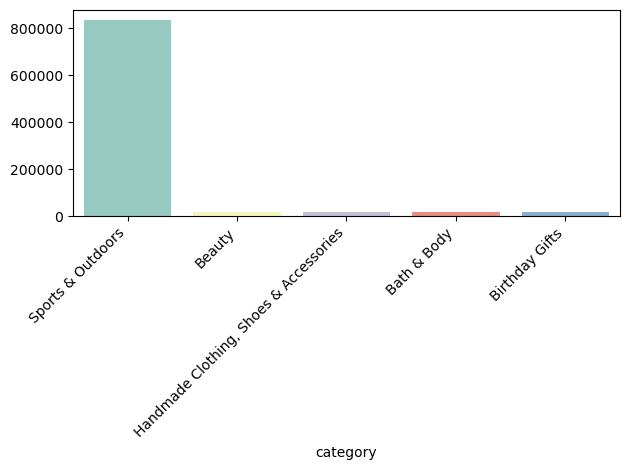

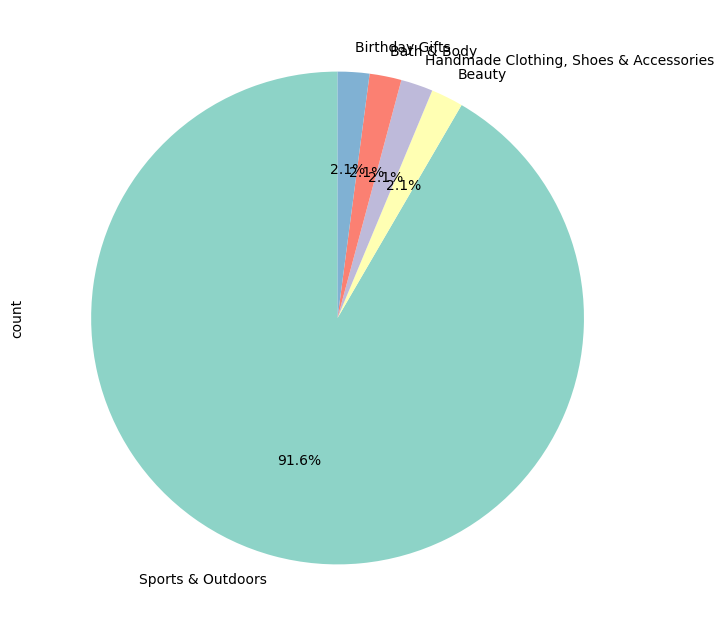

In [344]:
sns.barplot(x=freq_table.index,y=freq_table.values, palette="Set3")
plt.show()

sns.barplot(x=freq_table_5.index,y=freq_table_5.values, palette="Set3")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

freq_table_5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"),legend=False, figsize=(8, 8))
plt.show()

# Sports & Outdours dominates the listing

In [215]:
# Part 2: Delving into Product Pricing

In [217]:
# Measures of Centrality

print("mean:",round(df.price.mean(),2), "median:",df.price.median(), "mode:",df.price.mode()[0])

# the average price is 89.24 way higher that the mode 9.99, which indicates that there are outliers on the higher end of the dataset.


mean: 89.24 median: 19.09 mode: 9.99


In [219]:
# Measures of Dispersion

stats = {"std:": [df.price.std()],
         "var:": [df.price.var()],
         "range:": [(df.price.max()-df.price.min())],
         "interquartile range:": [(df.price.quantile(0.75)-df.price.quantile(0.25))]
        }

pd.DataFrame(stats).round(2).style.format("{:,.2f}")

# The data shows a skewed distribution with outliers on the higher end,
# as indicated by the large difference between the mean and median, the large range, and the high standard deviation. 

,std:,var:,range:,interquartile range:
0,345.61,"119,445.49","100,000.00",36.00


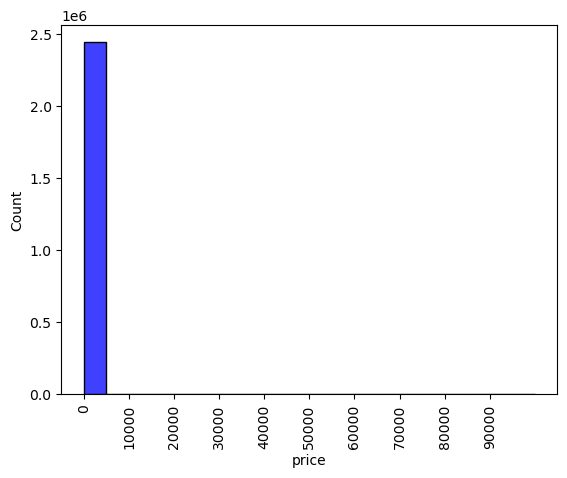

In [243]:
sns.histplot(df.price, bins=20, color="blue")
plt.xticks(np.arange(min(df.price), max(df.price), step=10000), rotation=90)
plt.show()

Text(0, 19.09, 'Median: 19.09')

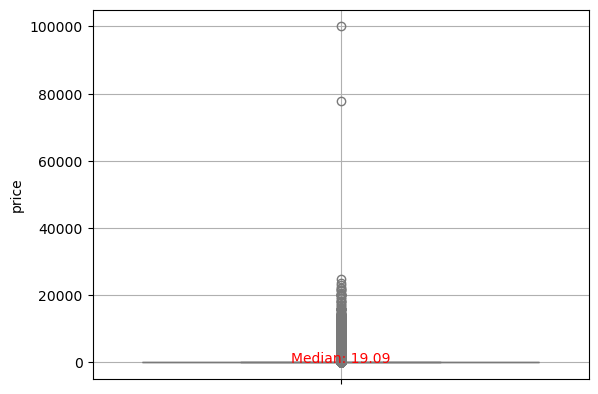

In [257]:
sns.boxplot(df.price, color="lightblue")
plt.grid(True)
median_value = df.price.median()
plt.text(0, median_value, f'Median: {median_value:.2f}', horizontalalignment='center', color='red')

In [ ]:
# Part 3: Unpacking Product Ratings

In [ ]:
# Measures of Centrality

In [262]:
stats_centrality = {"mean:": [df.stars.std()],
                    "median:": [df.stars.var()],
                    "mode:": [(df.stars.max()-df.price.min())],
                   }
stats_centrality

# The common trend is that customers more often give a high rate given that the median value is 4.81 and mode 5.00.
# A few extreme low ratings, which can be considered outliers, are driving the mean to a lower value.

{'mean:': [2.1948653785054697], 'median:': [4.81743402976196], 'mode:': [5.0]}

In [ ]:
# Measures of Dispersion

In [280]:
stats_dispersion = {"std:": [df.stars.std()],
                    "var:": [df.stars.var()],
                    "range:": [(df.stars.max()-df.price.min())],
                    "interquartile range:": [(df.stars.quantile(0.75)-df.stars.quantile(0.25))]
                    }

pd.DataFrame(stats_dispersion).round(2)

# Since the standard deviation is equal to the mean, it suggests that the ratings are very spread out.
# 50% of the ratings are at 4.4

,std:,var:,range:,interquartile range:
0,2.19,4.82,5.0,4.4


In [ ]:
# Shape of the Distribution

In [286]:
print(df.stars.skew())
print(df.stars.kurtosis())

0.08120735761080985
-1.9260061280432985


<Axes: xlabel='stars', ylabel='Count'>

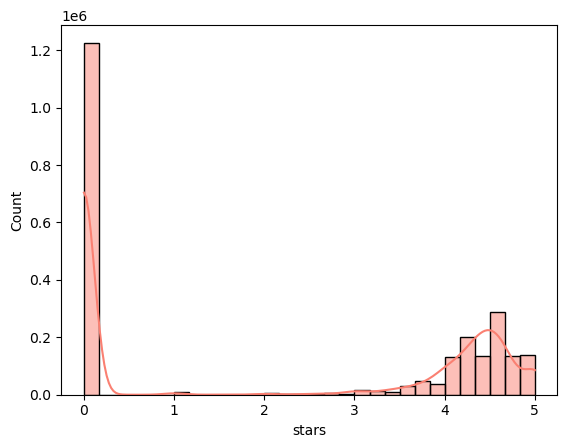

In [300]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

# There are alot of null values in the dataset. That's why the mean is lower.

In [326]:
# testing null values
(df['stars'] == 0).sum()/len(df)

# 0 rating for 50,15% of my rows

0.5015613931776673